<a href="https://colab.research.google.com/github/SepideHematian/my_course_projects/blob/main/602/Project3/Final_version_Project3_PCA%26Regularization_group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 3: PCA and Regularization
Data602

**Group 1** This project has been done by the folllowing people:

* Tahereh	Hematian Pour Fard 
* Leslie	Li
* Kent	Butler
* Colleen	Boarman


# Part 1: Describe and Understand the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split, KFold

**Download and Unzip dataset**

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

--2022-05-01 01:15:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7476401 (7.1M) [application/x-httpd-php]
Saving to: ‘OnlineNewsPopularity.zip’

OnlineNewsPopularit 100%[===================>]   7.13M  28.0MB/s    in 0.3s    

2022-05-01 01:15:21 (28.0 MB/s) - ‘OnlineNewsPopularity.zip’ saved [7476401/7476401]



In [3]:
from zipfile import ZipFile

with ZipFile('/content/OnlineNewsPopularity.zip', mode = 'r') as file:
  file.extractall(path = '/content/')

In [4]:
df = pd.read_csv('/content/OnlineNewsPopularity/OnlineNewsPopularity.csv')

**Inspect dataset**

In [5]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Part 1
Describe and Understand the data. Read through the data description, properly label your data so that others can also understand the data you are working with, as well as any kinds of feature engineering steps that you deem appropriate. (10pts)

In [6]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [7]:
df.shape

(39644, 61)

In [8]:
df.dtypes

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

In [9]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [10]:
#Correct extraneous space in the column names 
stripped_cols= []
for col in df.columns:
  stripped_cols.append(col.strip())

df.columns = stripped_cols

In [11]:
#Check
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [12]:
# Check for missing data
for col in df.columns:
  if df[col].hasnans:
    print(df[col])

#### Variable Definitions

Feature explanations.  In some cases we will rename columns for readability.

 0. url: URL of the article (non-predictive) 
 1. timedelta: Days between the article publication and the dataset acquisition (non-predictive) 
 2. n_tokens_title: Number of words in the title  
 3. n_tokens_content: Number of words in the content 
 4. n_unique_tokens: Rate of unique words in the content 
 5. n_non_stop_words: Rate of non-stop words in the content 
 6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
 7. num_hrefs: Number of links 
 8. num_self_hrefs: Number of links to other articles published by Mashable 
 9. num_imgs: Number of images 
 10. num_videos: Number of videos 
 11. average_token_length: Average length of the words in the content 
 12. num_keywords: Number of keywords in the metadata 
 13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? (lifestyle)
 14. data_channel_is_entertainment: Is data channel 'Entertainment'? (entertainment)
 15. data_channel_is_bus: Is data channel 'Business'? (business)
 16. data_channel_is_socmed: Is data channel 'Social Media'? (socmed)
 17. data_channel_is_tech: Is data channel 'Tech'? (tech)
 18. data_channel_is_world: Is data channel 'World'? (world)
 19. kw_min_min: Worst keyword (min. shares) (kw_min_worst)
 20. kw_max_min: Worst keyword (max. shares) (kw_max_worst)
 21. kw_avg_min: Worst keyword (avg. shares) (kw_avg_worst)
 22. kw_min_max: Best keyword (min. shares)  (kw_min_best)
 23. kw_max_max: Best keyword (max. shares)  (kw_max_best)
 24. kw_avg_max: Best keyword (avg. shares)  (kw_avg_best)
 25. kw_min_avg: Avg. keyword (min. shares)  (kw_min_avg)
 26. kw_max_avg: Avg. keyword (max. shares)  (kw_max_avg)
 27. kw_avg_avg: Avg. keyword (avg. shares)  (kw_avg_avg)
 28. self_reference_min_shares: Min. shares of referenced articles in Mashable
 29. self_reference_max_shares: Max. shares of referenced articles in Mashable
 30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
 31. weekday_is_monday: Was the article published on a Monday? (monday)
 32. weekday_is_tuesday: Was the article published on a Tuesday? (tuesday)
 33. weekday_is_wednesday: Was the article published on a Wednesday? (wednesday)
 34. weekday_is_thursday: Was the article published on a Thursday? (thursday)
 35. weekday_is_friday: Was the article published on a Friday? (friday)
 36. weekday_is_saturday: Was the article published on a Saturday? (saturday)
 37. weekday_is_sunday: Was the article published on a Sunday? (sunday)
 38. is_weekend: Was the article published on the weekend? (weekend)
 39. LDA_00: Closeness to LDA topic 0 
 40. LDA_01: Closeness to LDA topic 1 
 41. LDA_02: Closeness to LDA topic 2 
 42. LDA_03: Closeness to LDA topic 3 
 43. LDA_04: Closeness to LDA topic 4 
 44. global_subjectivity: Text subjectivity 
 45. global_sentiment_polarity: Text sentiment polarity 
 46. global_rate_positive_words: Rate of positive words in the content 
 47. global_rate_negative_words: Rate of negative words in the content 
 48. rate_positive_words: Rate of positive words among non-neutral tokens 
 49. rate_negative_words: Rate of negative words among non-neutral tokens 
 50. avg_positive_polarity: Avg. polarity of positive words 
 51. min_positive_polarity: Min. polarity of positive words 
 52. max_positive_polarity: Max. polarity of positive words 
 53. avg_negative_polarity: Avg. polarity of negative words 
 54. min_negative_polarity: Min. polarity of negative words 
 55. max_negative_polarity: Max. polarity of negative words 
 56. title_subjectivity: Title subjectivity 
 57. title_sentiment_polarity: Title polarity 
 58. abs_title_subjectivity: Absolute subjectivity level 
 59. abs_title_sentiment_polarity: Absolute polarity level 
 60. shares: Number of shares (target)

In [13]:
# Rename some columns for readability
rename_map = {
        'kw_min_min':'kw_worst_min',
        'kw_max_min': 'kw_worst_max',
        'kw_min_max':'kw_best_min',
        'kw_max_max': 'kw_best_max',
        'data_channel_is_lifestyle': 'lifestyle',
        'data_channel_is_entertainment':'entertainment',
        'data_channel_is_bus':'business',
        'data_channel_is_socmed':'social_media',
        'data_channel_is_tech':'tech',
        'data_channel_is_world':'world',
        'weekday_is_monday':'monday',
        'weekday_is_tuesday':'tuesday',
        'weekday_is_wednesday':'wednesday',
        'weekday_is_thursday':'thursday',
        'weekday_is_friday':'friday',
        'weekday_is_saturday':'saturday',
        'weekday_is_sunday':'sunday',
        'is_weekend':'weekend'
        }

df.rename(columns=rename_map, inplace=True)

In [14]:
# can we find our renamed columns?
len(np.where(df.columns == 'friday')) > 0

True

**Visualize feature correlations**

Text(0.5, 1.0, 'Heatmap of correlation among variables')

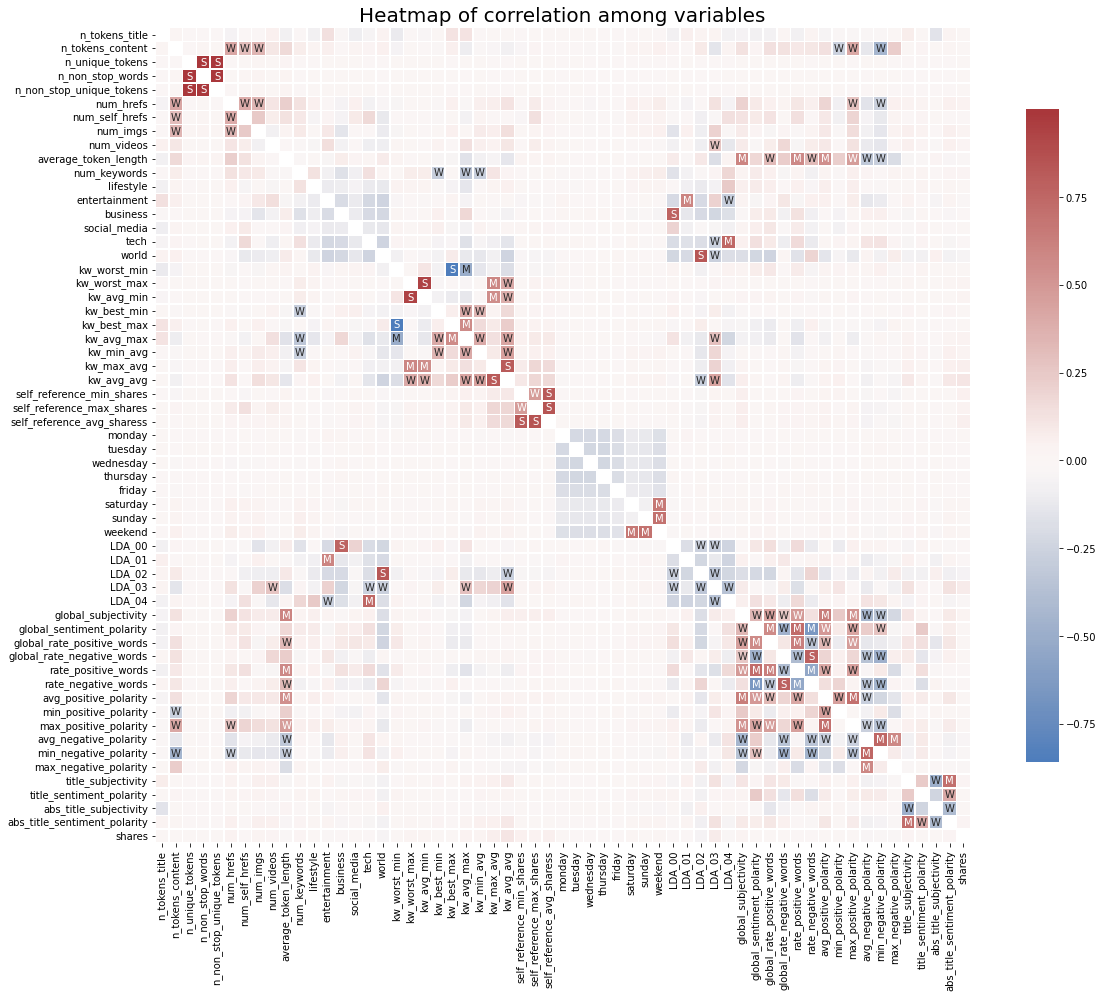

In [15]:
# Create a correlation matrix amongst all features
df_corr = df.drop(['url','timedelta'],axis=1).corr(method='pearson')

# Add labels
labels = np.where(np.abs(df_corr) > 0.75, 'S',
                  np.where(np.abs(df_corr) > 0.5, 'M',
                           np.where(np.abs(df_corr) > 0.25, 'W', '')))
# Plot the matrix
plt.figure(figsize=(20,15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt = '', linewidths = .5,
            cmap='vlag', cbar_kws={'shrink':0.8});
plt.title('Heatmap of correlation among variables', fontsize=20)

**Observations**

There are a fair number of features showing strong correlations to each other, as depicted in the heatmap by the squares labelled 'S'.

This will be an important aspect of the choice of model - having such correlations can negatively impact regression results.  The algorithms will handle these corresponding features differently.

## Part 2: Train-test split
Train-test split. You can choose the % allocation, and work only on the training data for the following steps.
Note, since we work with PCA, standardizing data is more preferred than normalization. (see here, second paragraph, starting with ‘I have not …’). Thus in this project you should standardize your features

*   (a) Draw out a Lasso path plot
*   (b) Use Lasso paths to pick out the 3 most and least relevant features
*   (c) Elaborate on why you think they are relevant or irrelevant. 

In [16]:
df['shares']

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

**Perform the train/test split**

In [17]:
from sklearn.model_selection import train_test_split, KFold

# Defining X and Y
X = df.drop(['shares', 'url','timedelta'],axis=1)
y = df.shares

# Split the train and test sets
X_train,X_test, y_train, y_test = train_test_split(X , y, test_size = .3, random_state = 1000)

In [18]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
n_tokens_title,27750.0,10.401189,2.118499,3.000000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,27750.0,545.297910,470.991842,0.000000,246.000000,408.000000,711.000000,8474.000000
n_unique_tokens,27750.0,0.531040,0.136582,0.000000,0.471171,0.539797,0.609302,1.000000
n_non_stop_words,27750.0,0.970775,0.168440,0.000000,1.000000,1.000000,1.000000,1.000000
n_non_stop_unique_tokens,27750.0,0.673305,0.153226,0.000000,0.625618,0.690636,0.755236,1.000000
num_hrefs,27750.0,10.876108,11.414819,0.000000,4.000000,7.000000,14.000000,304.000000
num_self_hrefs,27750.0,3.293153,3.812406,0.000000,1.000000,3.000000,4.000000,74.000000
num_imgs,27750.0,4.519027,8.221381,0.000000,1.000000,1.000000,4.000000,111.000000
num_videos,27750.0,1.248180,4.135981,0.000000,0.000000,0.000000,1.000000,91.000000
average_token_length,27750.0,4.550384,0.837286,0.000000,4.477931,4.663366,4.854822,8.041534


In [19]:
X_train.shape, y_train.shape

((27750, 58), (27750,))

In [20]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

**Define data pre-processing**

In [21]:
pre_pipeline = Pipeline(steps = [
                ('scale',StandardScaler()), 
                ('poly', PolynomialFeatures(degree = 2, interaction_only = False))])

In [22]:
X_train_tx = pre_pipeline.fit_transform(X_train)
X_test_tx = pre_pipeline.transform(X_test)

In [23]:
# Workaround to silence sklearn warnings - some of the LR algos prefer a
#   column vector and some prefer a 1D array when fitting.
#   This will silence the warnings, for readability.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


**Draw Lasso path for analyzing the features**

In [24]:
from sklearn.linear_model import lasso_path

In [25]:
#alphas, coefs, _, n_iter = lasso_path(X = X_scaled, y = y_train, alphas = [.0001, .001, .01, .1, .5, 1, 10, 100, 1000, 10000], verbose=True, return_n_iter= True)
#alphas, coefs, _, n_iter = lasso_path(X = X_scaled, y = y_train, alphas = [100,200,300,500,700,2285717514424], verbose=True, return_n_iter= True)
alphas, coefs, _, n_iter = lasso_path(X = X_train_tx, y = y_train, return_n_iter= True)

In [26]:
# Note the diff value per alpha per coeff
#   coefs.shapeFitting a time-series model, imposing that any active feature be active at all times.



In [27]:
# Handy way to visualize the coefs 
cdf = pd.DataFrame(coefs, columns=alphas)
cdf.iloc[:,1:11]

,12011.133386,11201.623196,10446.671283,9742.600602,9085.981929,8473.617157,7902.523721,7369.920071,6873.212124,6409.980631
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...
1765,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1768,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


**Plot convergence to zero**

In [28]:
import itertools
# Globally making the plots larger 
plt.rcParams["figure.figsize"] = (15,11)

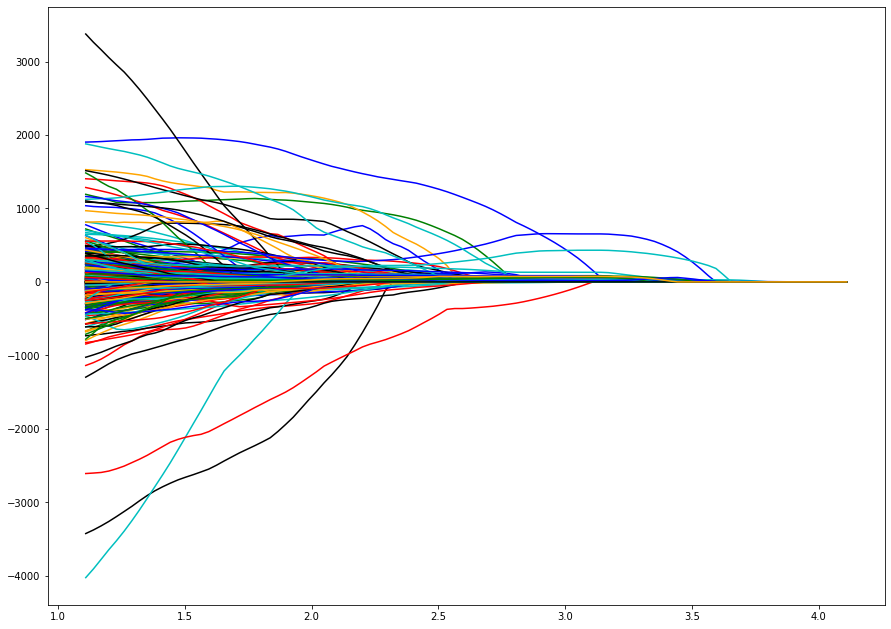

In [29]:
plt.figure(1)
colors = itertools.cycle(['b','r', 'g','c','k','orange'])
log_alphas_lasso = np.log10(alphas)
#log_alphas_lasso = alphas
for coef_l,c in zip(coefs, colors):
  #plt.xlim([1, 5])
  l1 = plt.plot(log_alphas_lasso, coef_l, c=c)

In [30]:
# Not as accurate a predictor as examining the coeffs over the alpha range

abs(pd.DataFrame(coefs, columns=alphas).mean(axis=1)).sort_values()

781       0.000000
564       0.000000
1190      0.000000
566       0.000000
567       0.000000
           ...    
1245    553.703407
999     578.734830
1267    802.172981
562     865.321702
0       965.920690
Length: 1770, dtype: float64

**Note:** *Polynomial expansion is obscuring the actual data points.*

For this reason we will not use this method, since our objective is to identify specific strongly and weakly correlated features.

**Try again with only Standard Scaling**

In [31]:
std_scaler = StandardScaler()

In [32]:
X_train_tx = std_scaler.fit_transform(X_train)
X_test_tx = std_scaler.transform(X_test)

In [33]:
feature_names = std_scaler.get_feature_names_out()

**Draw Lasso path for analyzing the features**

In [34]:
#alphas, coefs, _, n_iter = lasso_path(X = X_scaled, y = y_train, alphas = [.0001, .001, .01, .1, .5, 1, 10, 100, 1000, 10000], verbose=True, return_n_iter= True)
#alphas, coefs, _, n_iter = lasso_path(X = X_scaled, y = y_train, alphas = [100,200,300,500,700,2285717514424], verbose=True, return_n_iter= True)
alphas, coefs, _, n_iter = lasso_path(X = X_train_tx, y = y_train, return_n_iter= True)

In [35]:
# Note the diff value per alpha per coeff
coefs.shape

(58, 100)

In [36]:
# Handy way to visualize the coefs 
cdf = pd.DataFrame(coefs, columns=alphas)
cdf.iloc[:,1:11]

,1272.045967,1186.314327,1106.360711,1031.795702,962.256125,897.403283,836.921305,780.515610,727.911471,678.852674
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.000000,-0.000000,-0.000000,-0.000000,-0.00000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
3,-0.000000,-0.000000,-0.000000,-0.000000,-0.00000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
4,-0.000000,-0.000000,-0.000000,-0.000000,-0.00000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
5,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
6,-0.000000,-0.000000,-0.000000,-0.000000,-0.00000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
7,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
9,-0.000000,-0.000000,-0.000000,-0.000000,-0.00000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


**Plot convergence to zero**

In [37]:
from matplotlib import pyplot as plt
import itertools
# Globally making the plots larger 
plt.rcParams["figure.figsize"] = (15,11)

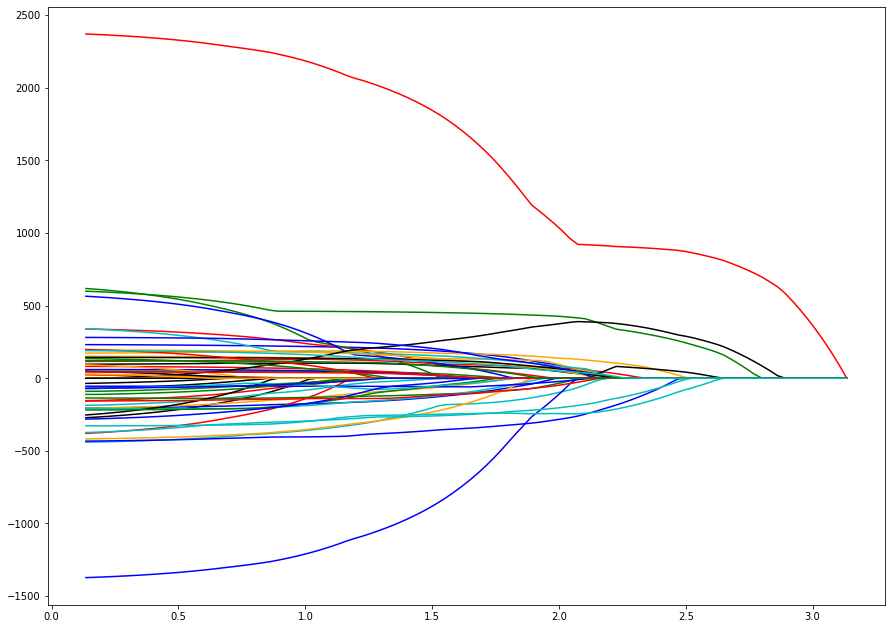

In [38]:
plt.figure(1)
colors = itertools.cycle(['b','r', 'g','c','k','orange'])
log_alphas_lasso = np.log10(alphas)
#log_alphas_lasso = alphas
for coef_l,c in zip(coefs, colors):
  #plt.xlim([1, 5])
  l1 = plt.plot(log_alphas_lasso, coef_l, c=c)

**Note:** The features with the most correlation to Y will remain above 0 longer.  Those crashing to zero quickly did not have much correlation.

*Keep your features with the strongest correlations.*

In [39]:
y_train# Not as accurate a predictor as examining the coeffs over the alpha range

abs(pd.DataFrame(coefs, columns=alphas).mean(axis=1)).sort_values()

41       0.000000
3        0.000000
35       0.000000
33       0.015327
46       0.026636
32       0.252961
53       2.907911
37       3.969932
22       4.163134
52       5.974284
16      11.042886
47      12.598923
55      18.247887
54      18.953919
14      20.635560
8       22.778781
36      23.639607
38      25.491360
45      29.375376
31      30.710487
28      32.332701
30      33.724650
13      35.196836
50      36.657303
15      48.765603
43      49.733224
4       53.263819
56      58.666930
10      59.553057
11      72.441109
7       74.123180
20      74.855736
44      82.264508
34      82.296396
49      82.449447
48      87.011503
17      89.419503
19      90.560338
57      91.916897
6       95.039756
21      96.221355
29      99.663538
5      123.863395
1      126.500070
0      128.069488
27     131.141995
42     143.776597
2      172.697075
18     173.963211
40     177.566650
23     181.611489
9      197.281462
51     201.217261
39     210.572079
12     265.710907
26     374

In [40]:
# Strongest features: identified via detailed dataFrame inspection
feature_names[25], feature_names[26], feature_names[40]

('kw_avg_avg', 'self_reference_min_shares', 'LDA_03')

In [41]:
# Strongest features: identified via absolute value of coefficient means
feature_names[24], feature_names[25], feature_names[26]

('kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares')

In [42]:
# Weakest features: identified via absolute value of coefficient means
feature_names[3], feature_names[33], feature_names[35]

('n_non_stop_words', 'friday', 'sunday')

### Why are the strongest features more relevant?

As the alpha values increase, the features are penalized and the lasso coefficients descend towards zero; when a coefficient reaches zero the feature is eliminated. 

The features which remain non-zero longest show the most statistical relevance to the target, due to the lasso coordinate descent.

### Why are the weakest features irrelevant?

These are the features with the least correlation to the training values as calculated by lasso regression.


# Part 3: Apply PCA

Apply PCA to reduce feature dimension, and use a 3-fold cross-validation method to determine the number of dimensions (n_components) we should reduce the features to when fitting a LinearRegression model.

* (a) Use mean-squared error as the evaluation metric
* (b) Plot out the training/validation error curve corresponding to n_components
* (c) Pick the best n_component and its corresponding training error




In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [44]:
# scikit-learn k-fold cross-validation
#   Based on https://machinelearningmastery.com/k-fold-cross-validation/
#       and  https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
from numpy import array
from sklearn.model_selection import KFold

In [45]:
# Use KFold to separate into 3 cross-validation sets
kfold = KFold(n_splits=3, random_state=100, shuffle=True)

train_folds = {}
validation_folds = {}

# Split out train and validation sets for convenience
for i, (train, validation) in enumerate(kfold.split(X_train_tx)):
	train_folds[i+1], validation_folds[i+1] = train, validation

In [46]:
X_train_tx.shape, y_train.shape

((27750, 58), (27750,))

In [47]:
lr = LinearRegression()
lr.fit(X = X_train_tx, y = y_train)

LinearRegression()

In [48]:
training_error_folds = {}
validation_error_folds = {}
variance_explained = {}
debug = False

for f in range(3):
  training_error = {}
  validation_error = {}
  if debug == True:
      print (f'Beginning fold: {f}:: ')

  for i in range(1, 59):
      # Test PCA with i number of components
      pca = PCA(n_components = i)

      # Extract the fold data 
      X_train_fold = X_train_tx[train_folds[f+1],:]
      y_train_fold = y[train_folds[f+1]]
      X_validation = X_train_tx[validation_folds[f+1],:]
      y_validation = y[validation_folds[f+1]]

      # Fit the PCA object
      if debug == True:
         print (f'Num components: {i}: fitting ')
      X_train_scaled_PCA = pca.fit_transform(X_train_fold)
      X_validation_scaled_PCA = pca.transform(X_validation)

      # Fit the Linear Regression
      lr.fit(X_train_scaled_PCA, y_train_fold)

      # Predict on train 
      y_train_predict_PCA = lr.predict(X_train_scaled_PCA)
      training_error[i] = mean_squared_error(y_train_predict_PCA, y_train_fold)

      # Predict on validation
      y_validation_predict_PCA = lr.predict(X_validation_scaled_PCA)
      validation_error[i] = mean_squared_error(y_validation_predict_PCA, y_validation)
  
  # Completed Fold -- summarize data
  if debug == True:
      print (f'Components completed for fold: {f}: summarizing ')
  # Capture PCA statistics
  variance_explained[f'fold_{f+1}'] = pca.explained_variance_ratio_
  training_error_folds[f'fold_{f+1}'] = training_error
  validation_error_folds[f'fold_{f+1}'] = validation_error

if debug == True:
  print (f'Completed::')

(array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57]),)
(array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57]),)
(array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57]),)


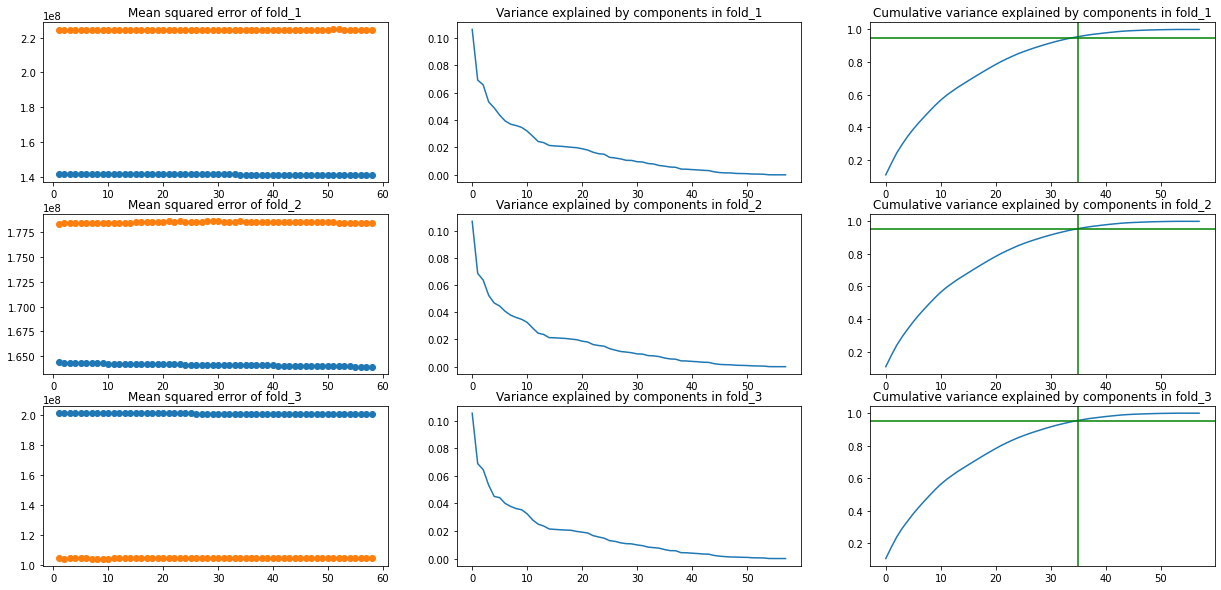

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,3, figsize=(21,10))

for i, key in enumerate(training_error_folds.keys()):
  ax[i, 0].scatter(training_error_folds[f'fold_{i+1}'].keys(), training_error_folds[f'fold_{i+1}'].values())
  ax[i, 0].scatter(validation_error_folds[f'fold_{i+1}'].keys(), validation_error_folds[f'fold_{i+1}'].values())
  ax[i, 0].set_title(f'Mean squared error of fold_{i+1}')
  ax[i, 1].plot(range(len(variance_explained[f'fold_{i+1}'])), variance_explained[f'fold_{i+1}'])
  ax[i, 1].set_title(f'Variance explained by components in fold_{i+1}')
  # ax[i, 1].set_xlim(1, 58)
  cumsum = np.cumsum(variance_explained[f'fold_{i+1}'])
  print(np.where(cumsum>0.95))
  num_p = np.where(cumsum>0.95)[0][0]
  ax[i, 2].plot(range(len(cumsum)), cumsum)
  ax[i, 2].axhline(0.95, color='g')
  ax[i, 2].axvline(num_p, color='g')
  ax[i, 2].set_title(f'Cumulative variance explained by components in fold_{i+1}')

In [50]:
# Record the optimal number of principal components
PCA_OPTIMAL_COMPONENTS = 35

**Number of components**

*The optimal number of components is 35*, where the where cumulative sum of variances is greater than 0.95.

*Interesting to note*, there are a few components having a high impact on the variance, as demonstrated by the 'Variance explained by components' graphs at the lower end of the '**num_components**' axis.

# Part 4: Apply 3-fold CVs

Apply 3-fold CVs and search for the best lambdas for Lasso and Ridge. Specify evaluation metric as mean-squared error.

* (a) Get the best model for Lasso
* (b) Same for Ridge


## Lasso

In [51]:
from sklearn.linear_model import Lasso, LassoCV

# Disable the warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# Search for the best lambdas for Lasso
#   Allow Lasso to choose alphas for a more robust range
lasso = LassoCV(cv = 3)

# Fit data... Lasso will assign the best alpha
_ = lasso.fit(X_train_tx, y_train)

print('Best alpha:', lasso.alpha_)

Best alpha: 33.786657534485165


In [52]:
# Assign best value for convenience
LASSO_ALPHA = 33.786657534485165

In [53]:
# Build and fit Lasso regressor
lasso = Lasso(alpha=LASSO_ALPHA)

lasso.fit(X_train_tx, y_train)

Lasso(alpha=33.786657534485165)

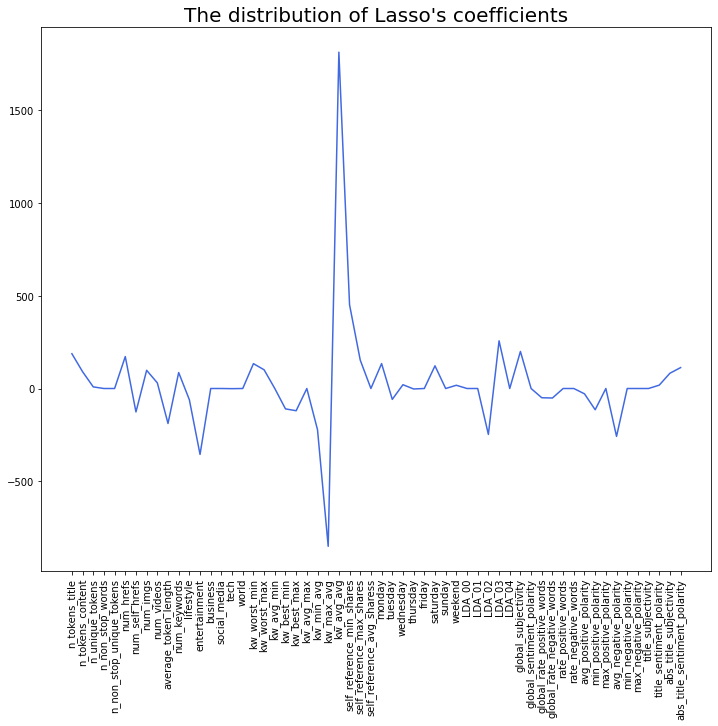

In [54]:
fig, ax = plt.subplots(figsize=(12,10))

ax.plot(X_train.columns, lasso.coef_, color = 'royalblue')

plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("The distribution of Lasso's coefficients",fontsize=20)
plt.show()

The features with the most correlation to Y will remain above 0 longer. Those crashing to zero quickly did not have much correlation.

In [55]:
# Since Lasso can also do feature selection, take a look at the change in number of features 
print(f'Number of features before Lasso: {len(lasso.coef_)}')

print(f'Number of features after fitting Lasso: {len(lasso.coef_[lasso.coef_ > 0])}')

Number of features before Lasso: 58
Number of features after fitting Lasso: 21


## Ridge

In [56]:
from sklearn.linear_model import RidgeCV

#ridge = RidgeCV(alphas=np.arange(1,100,5), scoring='r2', cv=3)
ridge = RidgeCV(scoring='r2', cv=3)

_ = ridge.fit(X_train_tx, y_train) 


print('Best alpha:', ridge.alpha_)

Best alpha: 10.0


In [57]:
# Assign best value for convenience
RIDGE_ALPHA = 10

# Part 5: Evaluate model performance among PCA, LASSO, and Ridge 

Evaluate model performance among PCA from 3(c), LASSO from 4(a) and Ridge from 4(b), using your test data; and conclude.

**PCA**

In [58]:
# Train the model with the best number of principal components
lin_reg_pca = LinearRegression().fit(X_train_scaled_PCA[:, :PCA_OPTIMAL_COMPONENTS], y_train_fold)

# Get the 35 principal components of test set
X_test_pca = pca.transform(X_test_tx)[:,:PCA_OPTIMAL_COMPONENTS]

# Predict on test data
pred_train = lin_reg_pca.predict(X_train_scaled_PCA[:, :PCA_OPTIMAL_COMPONENTS])
preds = lin_reg_pca.predict(X_test_pca)
MSE_pca_train = mean_squared_error(y_train_fold, pred_train)
MSE_pca = mean_squared_error(y_test, preds)
print(f'MSE_train of Principal Component Regression: {MSE_pca_train}')
print(f'MSE of Principal Component Regression: {MSE_pca}')

MSE_train of Principal Component Regression: 201046853.43875274
MSE of Principal Component Regression: 67393880.82400317


**Lasso**

In [59]:
# Build/fit Lasso using optimal alpha
lasso = Lasso(alpha=LASSO_ALPHA)
lasso.fit(X_train_tx, y_train)

# Predictions
pred_train = lasso.predict(X_train_tx)
preds = lasso.predict(X_test_tx)

# Calculate errors
MSE_lasso_train = mean_squared_error(y_train, pred_train)
MSE_lasso = mean_squared_error(y_test, preds)

print(f'Training score: {lasso.score(X_train_tx, y_train)}')
print(f'Testing score: {lasso.score(X_test_tx, y_test)}')
print(f'MSE_train of Lasso Regression: {MSE_lasso_train}')
print(f'MSE of Lasso Regression: {MSE_lasso}', '\n')

Training score: 0.020562444575093042
Testing score: 0.028179269345362745
MSE_train of Lasso Regression: 161122697.69879583
MSE of Lasso Regression: 64846920.16468172 



**Ridge**

In [60]:
from sklearn.linear_model import Ridge

In [61]:
ridge = Ridge(alpha=RIDGE_ALPHA)
_ = ridge.fit(X_train_tx, y_train)

# Predictions
pred_train = ridge.predict(X_train_tx)
preds = ridge.predict(X_test_tx)

# Calculate errors
MSE_ridge_train = mean_squared_error(y_train, pred_train)
MSE_ridge = mean_squared_error(y_test, preds)

print(f'Training score: {ridge.score(X_train_tx, y_train)}')
print(f'Testing score: {ridge.score(X_test_tx, y_test)}')
print(f'MSE_train of Ridge Regression: {MSE_ridge_train}')
print(f'MSE of Ridge Regression: {MSE_ridge}', '\n')

Training score: 0.021551192456086832
Testing score: -0.4263163575447433
MSE_train of Ridge Regression: 160960043.40292233
MSE of Ridge Regression: 95174161.29308029 



In [62]:
result = pd.DataFrame({'Type': ['test', 'train', 'test','train', 'test', 'train'],
                       'Method': ['PCA', 'PCA', 'Lasso','Lasso', 'Ridge', 'Ridge'],
                       'MSE':[MSE_pca, MSE_pca_train, MSE_lasso, MSE_lasso_train, MSE_ridge, MSE_ridge_train]})
result.sort_values(by=['Type','MSE'],ascending=True)

,Type,Method,MSE
2,test,Lasso,6.484692e+07
0,test,PCA,6.739388e+07
4,test,Ridge,9.517416e+07
5,train,Ridge,1.609600e+08
3,train,Lasso,1.611227e+08
1,train,PCA,2.010469e+08


## Conclusion

In conclusion, the dataset is more challenging to deal with because there are a high number of features, some are very high-valued, and there are several displaying high correlation amongst themselves.

**Expectations**

Based on this, we were expecting the best performance out of the Lasso because it is good at eliminating irrelevant features in large datasets, and is less senstive to correlated features.

We had less confidence in the Ridge method because although it would reduce the impact of the features, there are still many in the dataset and several on the extreme end of the scale.

We thought that PCA could have a good chance to do something interesting with the dataset due to its ability to locate the strongest features using interaction features.

**Results**

Overall Lasso did perform the best of the three in this experiment, with PCA performing almost as well.  This seems consistent with the intuition that reducing the number of input features would produce better results.

In the training sets, Ridge performed better, probably because it is less aggressive and will train with a lower bias. Its significant increase in variance on the test set is probably showing its over-fitting. 

Overall, it does seem like a linear model might not be the best choice for this dataset, based on:
* both training and test errors are rather high
* the training errors are significantly higher than the test errors
* Ridge performed almost as well as the others, despite the presence of many correlating features

and this dataset would be a good candidate to try other less linear techniques.